#📌 Extracão

In [1]:
import pandas as pd
import requests
import json

url = 'https://raw.githubusercontent.com/nanaaabueno/challenge2_-data-science_TelecomX/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
dados = response.json()

In [2]:
df_telecomx = pd.json_normalize(dados)

In [3]:
df_telecomx

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#📊 Carga e análise

🔍 **Análise da Estrutura dos Dados**
Os dados são organizados em um formato hierárquico (dicionário dentro de dicionário), contendo as seguintes informações:

1. **Identificação do Cliente**  
   - `'customerID'`: Identificador único do cliente.  
   - `'Churn'`: Indica se o cliente cancelou o serviço (`Yes` ou `No`).  

2. **Informações do Cliente** (`'customer'`)  
   - `'gender'`: Gênero do cliente (`Male` ou `Female`).  
   - `'SeniorCitizen'`: Indica se o cliente é idoso (0 = Não, 1 = Sim).  
   - `'Partner'`: Se o cliente tem um parceiro(a).  
   - `'Dependents'`: Se o cliente tem dependentes.  
   - `'tenure'`: Tempo de permanência como cliente (em meses).  

3. **Serviços de Telefonia** (`'phone'`)  
   - `'PhoneService'`: Indica se o cliente possui serviço de telefone (`Yes` ou `No`).  
   - `'MultipleLines'`: Se possui múltiplas linhas telefônicas.  

4. **Serviços de Internet** (`'internet'`)  
   - Tipo de serviço de internet contratado (`DSL`, `Fiber optic`, `No`).  
   - Serviços adicionais (`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`).  

5. **Informações da Conta** (`'account'`)  
   - `'Contract'`: Tipo de contrato (`Month-to-month`, `One year`, `Two year`).  
   - `'PaperlessBilling'`: Se o cliente recebe faturas eletrônicas.  
   - `'PaymentMethod'`: Método de pagamento (`Bank transfer`, `Credit card`, `Electronic check`, `Mailed check`).  
   - `'Charges'`:  
     - `'Monthly'`: Valor mensal cobrado.  
     - `'Total'`: Valor total pago pelo cliente.

In [4]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**VERIFICAÇÕES**
1. Verificando valores unicos

In [5]:
df_telecomx.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
df_telecomx['customerID'].nunique()

7267

In [7]:
print(f'{'customerID'}: {df_telecomx['customerID'].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


In [8]:
for col in df_telecomx.columns:
  print(f'{col}: {df_telecomx[col].nunique()}')
  if df_telecomx[col].nunique() < 100:
    print(df_telecomx[col].unique())
  else:
    print('Muitos registros únicos para imprimir.')
  print('-' * 50)

customerID: 7267
Muitos registros únicos para imprimir.
--------------------------------------------------
Churn: 3
['No' 'Yes' '']
--------------------------------------------------
customer.gender: 2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen: 2
[0 1]
--------------------------------------------------
customer.Partner: 2
['Yes' 'No']
--------------------------------------------------
customer.Dependents: 2
['Yes' 'No']
--------------------------------------------------
customer.tenure: 73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
phone.PhoneService: 2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines: 3
['No' 'Yes' 'No phone service']
---------------------------------------

2. Valores Duplicados

In [9]:
print("Numero de duplicados", df_telecomx.duplicated().sum())

Numero de duplicados 0


3. Valores nulos

In [10]:
print("Numero de Nulos \n", df_telecomx.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


4. Vazios ou em branco

In [11]:
df_telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


#🔧 Transformação

1. Alterando a coluna "account.Charges.Total" para Float

In [12]:
df_telecomx['account.Charges.Total'] = pd.to_numeric(df_telecomx['account.Charges.Total'], errors='coerce')

In [13]:
df_telecomx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [14]:
print("Numero de Nulos \n", df_telecomx.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [15]:
df_telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


2. Removendo registros sem informação de 'Churn'

In [16]:
df_telecomx = df_telecomx[df_telecomx['Churn'].str.strip() != '']
print("Número de linhas depois de eliminar as vazias em 'Churn':", len(df_telecomx))

Número de linhas depois de eliminar as vazias em 'Churn': 7043


  2.1. Verificação de vazias ou em branco

In [17]:
df_telecomx.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


3. Removendo registros com valores nulos para '*account.Charges.Total*'



In [18]:
df_telecomx = df_telecomx.dropna(subset=['account.Charges.Total'])

  3.1 Verificando valores nulos

In [19]:
print("Numero de Nulos \n", df_telecomx.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


# Criando coluna 'Contas_Diaria' — Opcional


In [20]:
df_telecomx['contas_diarias'] = df_telecomx['account.Charges.Monthly'] / 30
df_telecomx

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#Padronização

1. Renomeando as colunas - Tradução para português

In [21]:
colunas = {
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'idoso',
    'customer.Partner': 'possui_parceiro',
    'customer.Dependents': 'possui_dependentes',
    'customer.tenure': 'tempo_contrato',
    'phone.PhoneService': 'servico_telefone',
    'phone.MultipleLines': 'multiplas_linhas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'protecao_dispositivo',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_digital',
    'account.PaymentMethod': 'metodo_pagamento',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df_telecomx = df_telecomx.rename(columns = colunas)
df_telecomx

,id,Churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [22]:
df_telecomx['Churn'] = df_telecomx['Churn'].replace({'No': 'Não', 'Yes': 'Sim'})
df_telecomx['genero'] = df_telecomx['genero'].replace({'Female': 'Feminino', 'Male': 'Masculino'})
df_telecomx['possui_parceiro'] = df_telecomx['possui_parceiro'].replace({'Yes': 'Sim', 'No': 'Não'})
df_telecomx['possui_dependentes'] = df_telecomx['possui_dependentes'].replace({'Yes': 'Sim', 'No': 'Não'})
df_telecomx['servico_telefone'] = df_telecomx['servico_telefone'].replace({'Yes': 'Sim', 'No': 'Não'})
df_telecomx['multiplas_linhas'] = df_telecomx['multiplas_linhas'].replace({'No': 'Não', 'Yes': 'Sim', 'No phone service': 'Sem serviço de telefone'})
df_telecomx['tipo_internet'] = df_telecomx['tipo_internet'].replace({'No': 'Não'})
df_telecomx.head()

,id,Churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [23]:
columns_to_translate = ['seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'streaming_tv', 'streaming_filmes']
mapping = {'No': 'Não', 'Yes': 'Sim', 'No internet service': 'Sem serviço de internet'}
for col in columns_to_translate:
    df_telecomx[col] = df_telecomx[col].replace(mapping)

In [24]:
df_telecomx['tipo_contrato'] = df_telecomx['tipo_contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensal', 'Two year': 'Bienal'})
df_telecomx['tipo_internet'] = df_telecomx['tipo_internet'].replace({'Fiber optic': 'Fibra óptica', 'No':'Não'})

In [25]:
df_telecomx['fatura_digital'] = df_telecomx['fatura_digital'].replace({'Yes': 'Sim', 'No': 'Não'})

In [26]:
df_telecomx['metodo_pagamento'] = df_telecomx['metodo_pagamento'].replace({
    'Mailed check': 'Cheque enviado',
    'Electronic check': 'Cheque eletrônico',
    'Credit card (automatic)': 'Cartão de crédito (automático)',
    'Bank transfer (automatic)': 'Transferência bancária (automática)'
})

In [27]:
df_telecomx

,id,Churn,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,Não,Feminino,0,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,65.60,593.30,2.186667
1,0003-MKNFE,Não,Masculino,0,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,59.90,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,0,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,73.90,280.85,2.463333
3,0011-IGKFF,Sim,Masculino,1,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,98.00,1237.85,3.266667
4,0013-EXCHZ,Sim,Feminino,1,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,Não,Feminino,0,Não,Não,13,Sim,Não,DSL,...,Não,Sim,Não,Não,Anual,Não,Cheque enviado,55.15,742.90,1.838333
7263,9992-RRAMN,Sim,Masculino,0,Sim,Não,22,Sim,Sim,Fibra óptica,...,Não,Não,Não,Sim,Mensal,Sim,Cheque eletrônico,85.10,1873.70,2.836667
7264,9992-UJOEL,Não,Masculino,0,Não,Não,2,Sim,Não,DSL,...,Não,Não,Não,Não,Mensal,Sim,Cheque enviado,50.30,92.75,1.676667
7265,9993-LHIEB,Não,Masculino,0,Sim,Sim,67,Sim,Não,DSL,...,Sim,Sim,Não,Sim,Bienal,Não,Cheque enviado,67.85,4627.65,2.261667


#📊 Análise

1. Análise descritiva

In [28]:
df_telecomx.describe()

,idoso,tempo_contrato,valor_mensal,total_cobrado,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


2. Distribuição de Evasão

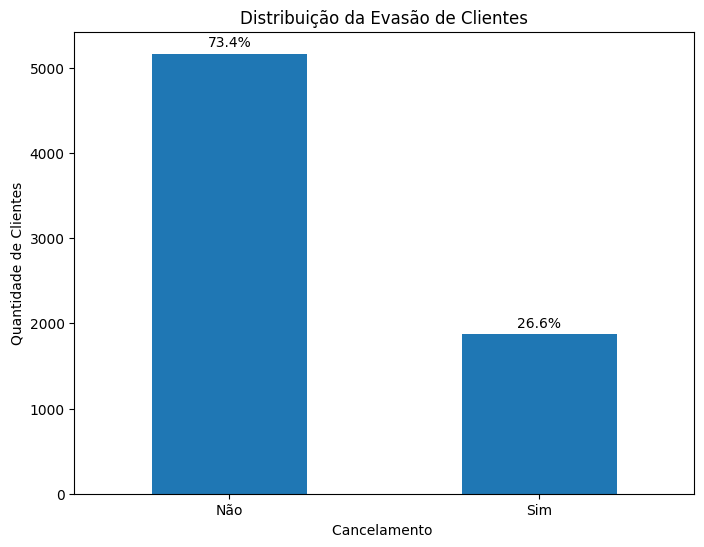

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
churn_counts = df_telecomx['Churn'].value_counts()
churn_percentages = (churn_counts / len(df_telecomx)) * 100

ax = churn_counts.plot(kind='bar')
plt.title('Distribuição da Evasão de Clientes')
plt.xlabel('Cancelamento ')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

3. Contagem de Evasão por Variáveis Categóricas.
  
  3.1 Quantidade de clientes

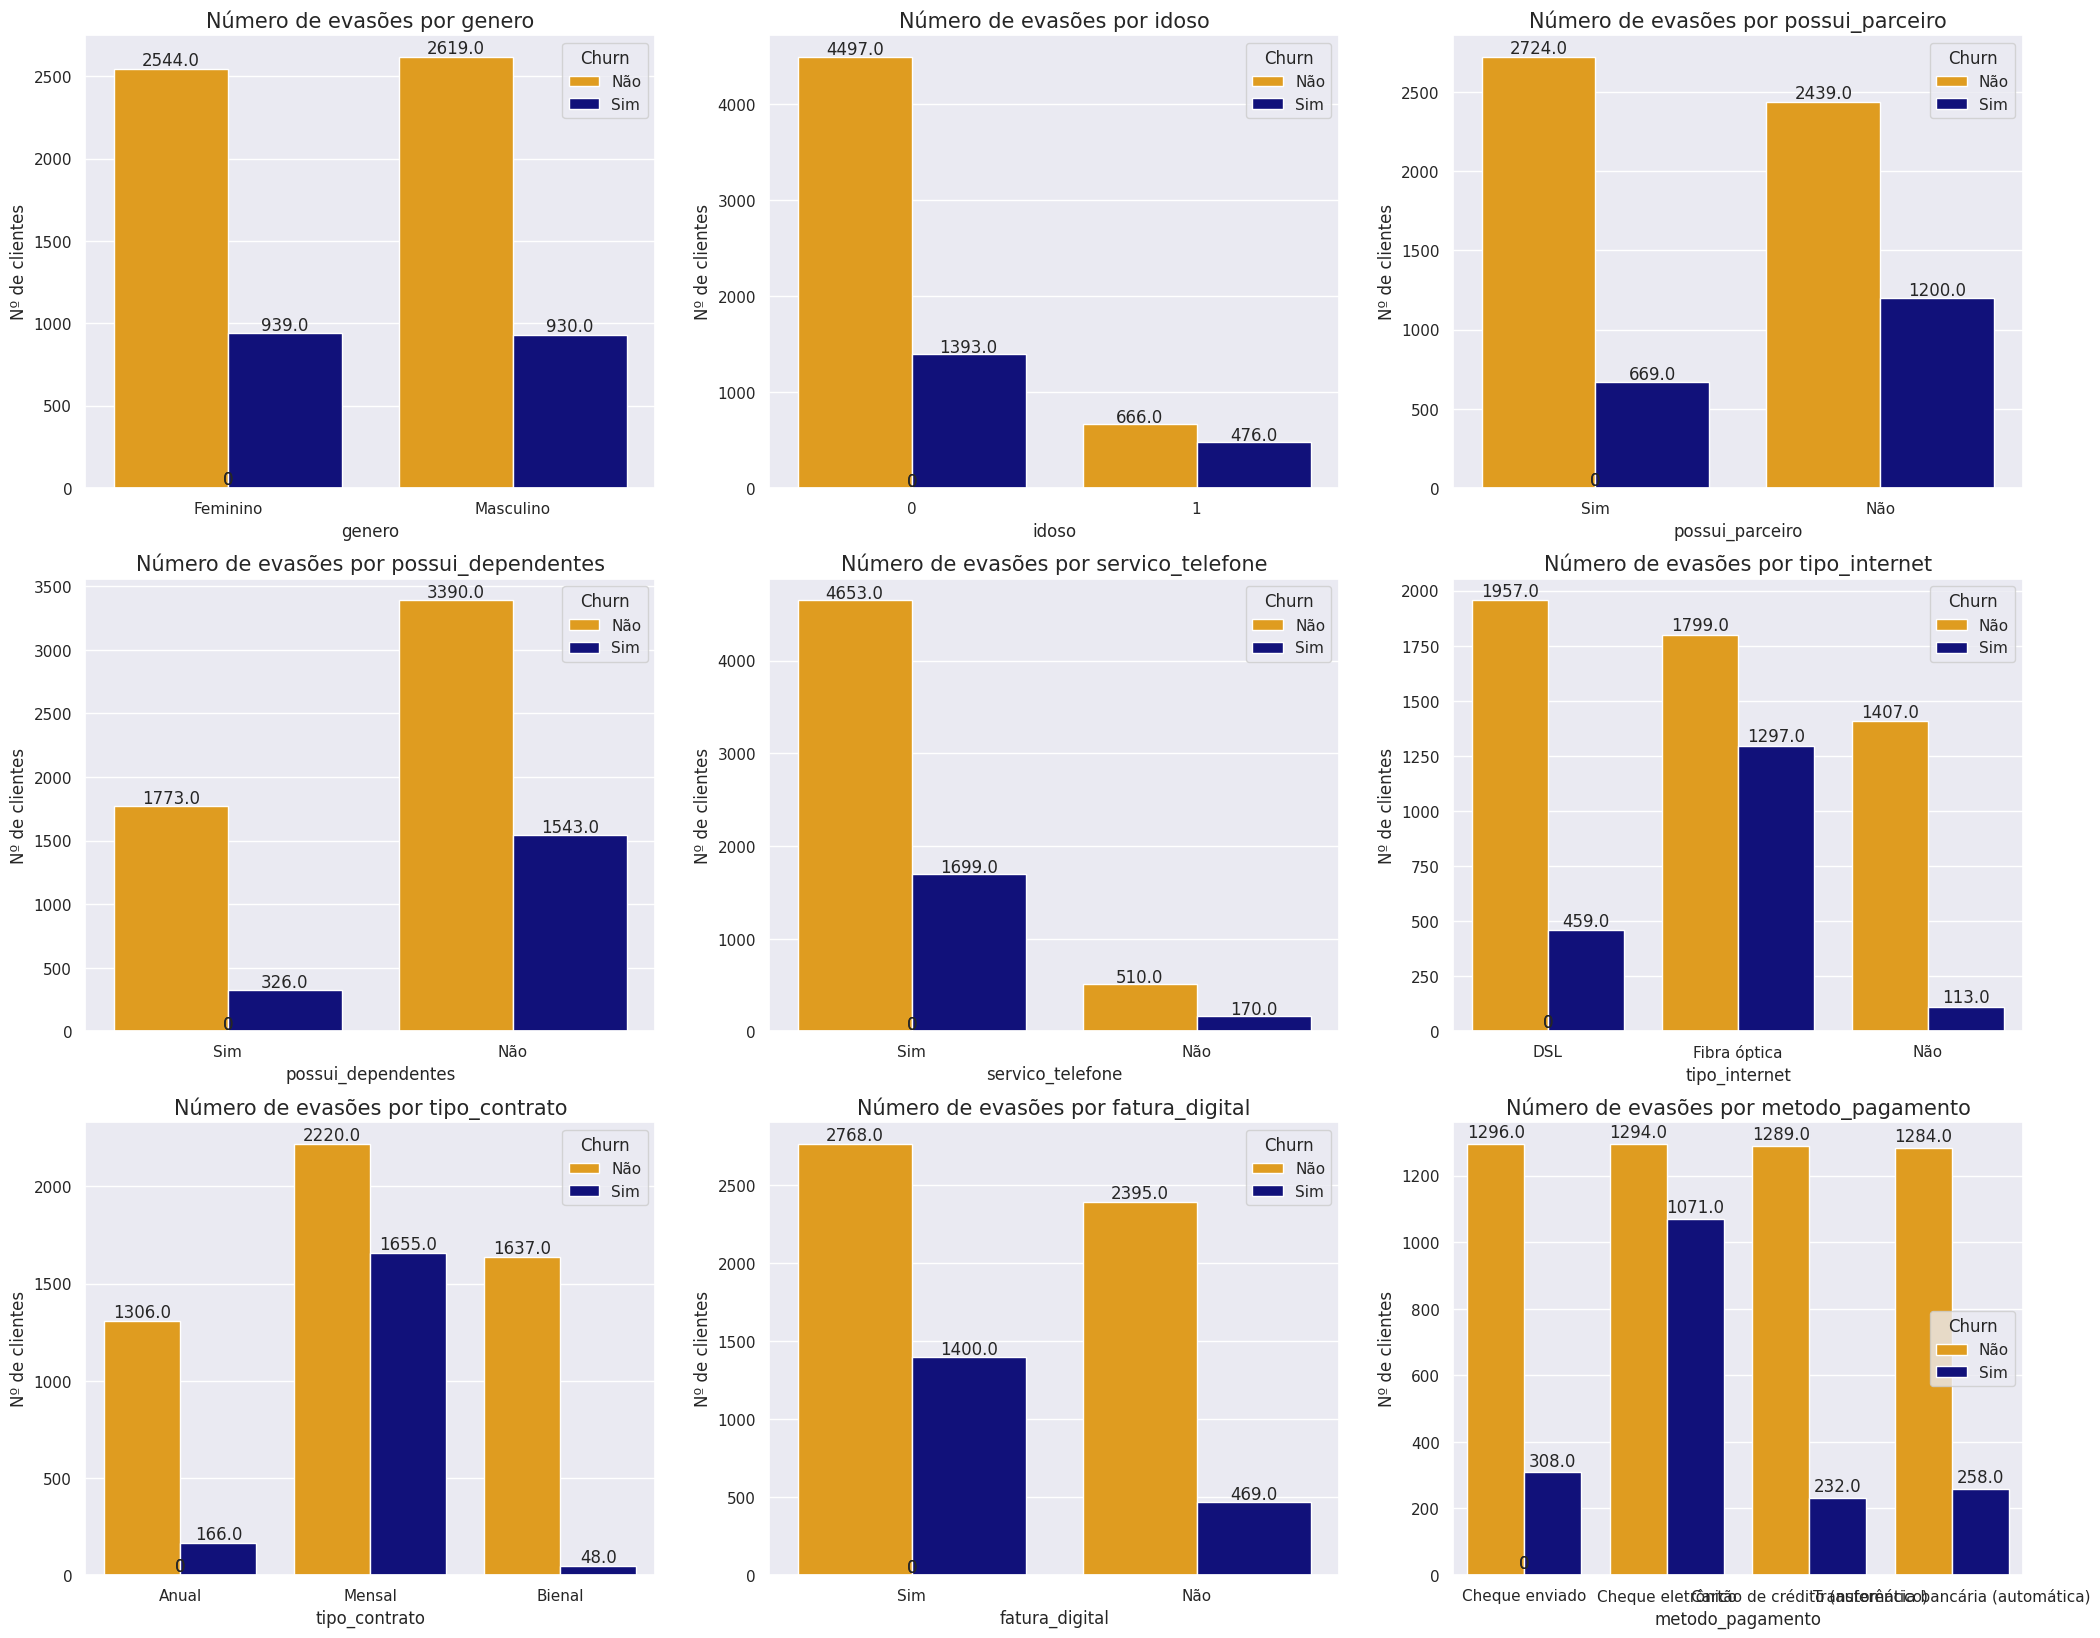

In [30]:
import seaborn as sns

variaveis_categoricas = ['genero', 'idoso', 'possui_parceiro',
       'possui_dependentes', 'servico_telefone', 'tipo_internet', 'tipo_contrato', 'fatura_digital',
       'metodo_pagamento',]

lista_variaveis_categoricas = list(enumerate(variaveis_categoricas))

sns.set(rc = {'figure.figsize':(25,20)})

for i in lista_variaveis_categoricas:

    plt.subplot(3, 3,  i[0]+1)
    ax = sns.countplot(data = df_telecomx,
                    x = i[1],
                    hue = 'Churn',
                    palette = {'darkblue', 'orange'},
                    )

    ax.set_title(f'Número de evasões por {i[1]}', fontsize = 15) # Adicionando título e aumentando o tamanho da fonte
    ax.set_ylabel('Nº de clientes', fontsize = 12) # Mudando o título do eixo Y e aumentando o tamanho da fonte
    ax.set_xlabel(i[1], fontsize = 12) # Mudando o título do eixo X e aumentando o tamanho da fonte

    # Adicionando rotúlo de dados do Nº de clientes
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
        height + 20,
        '{:1}'.format((height)),
        ha='center',
        size = 12)

plt.show()

  3. Contagem de Evasão por Variáveis Categóricas.
  
  3.2 Percentual

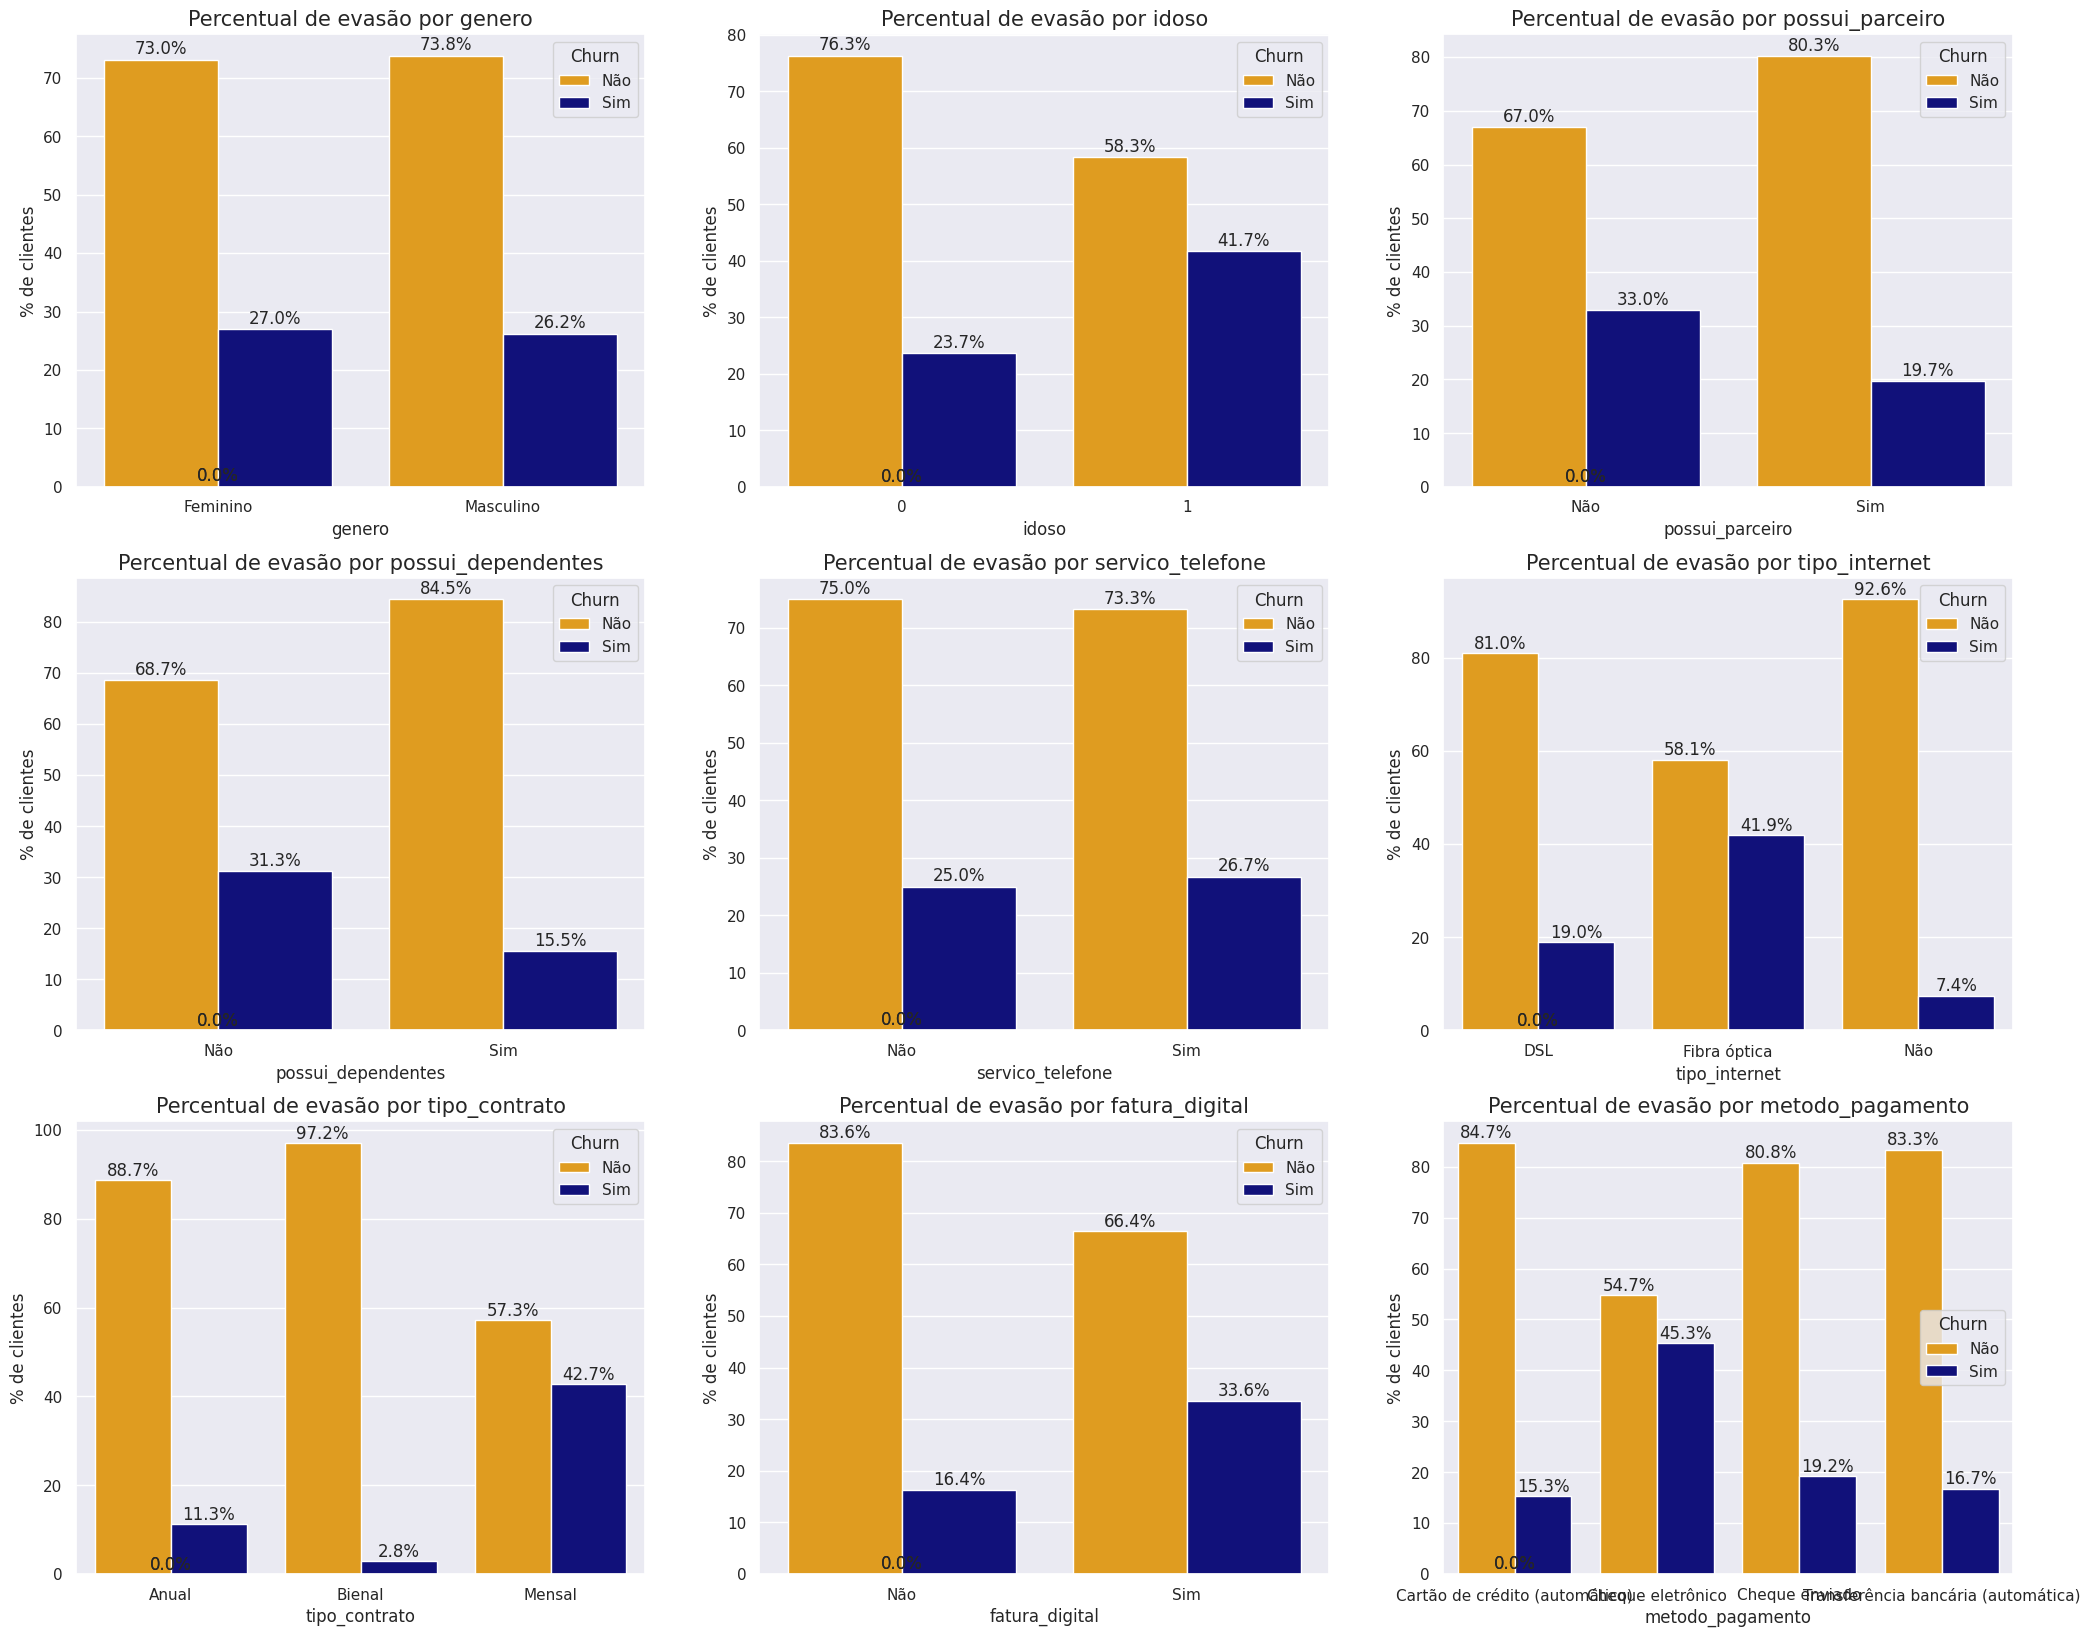

In [31]:
for i in lista_variaveis_categoricas:

    plt.subplot(3, 3, i[0] + 1)

    proporcao = (
        df_telecomx
        .groupby([i[1], 'Churn'])
        .size()
        .reset_index(name='total')
    )

    proporcao['percentual'] = (
        proporcao
        .groupby(i[1])['total']
        .transform(lambda x: x / x.sum() * 100)
    )

    ax = sns.barplot(
        data=proporcao,
        x=i[1],
        y='percentual',
        hue='Churn',
        palette={'orange', 'darkblue'}
    )

    ax.set_title(f'Percentual de evasão por {i[1]}', fontsize=15)
    ax.set_ylabel('% de clientes', fontsize=12)
    ax.set_xlabel(i[1], fontsize=12)

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 1,
            f'{height:.1f}%',
            ha='center',
            size=12
        )

plt.show()



In [35]:
import plotly.express as px
px.histogram(df_telecomx, x = 'tempo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

In [33]:
# Padronizar churn
df_telecomx['Churn'] = df_telecomx['Churn'].str.strip().str.lower()

# Agrupar
df_telecomx_grouped = df_telecomx.groupby(['tempo_contrato', 'Churn']).size().unstack(fill_value=0)

# Calcular churn rate
df_telecomx_grouped['churn_rate'] = (
    df_telecomx_grouped.get('sim', 0) / df_telecomx_grouped.sum(axis=1)
) * 100

# Plot
fig = px.line(
    df_telecomx_grouped.reset_index(),
    x='tempo_contrato',
    y='churn_rate',
    markers=True,
    title='Taxa de Churn (%) por Tempo de contrato'
)

fig.show()


In [36]:
px.histogram(df_telecomx, x = 'metodo_pagamento',  text_auto = True, color = 'Churn', barmode = 'group')

#📄Relatorio Final

📊 Telecom X – Análise de Evasão de Clientes (Churn)

**1. Introdução**

A Telecom X enfrenta um alto índice de cancelamento de clientes (Churn), o que impacta diretamente sua receita e sustentabilidade do negócio. Diante desse cenário, este projeto tem como objetivo analisar os dados de clientes da empresa para identificar padrões e fatores associados à evasão.

A partir dessa análise exploratória, busca-se gerar insights estratégicos que possam apoiar decisões futuras da área de Data Science, como a construção de modelos preditivos e o desenvolvimento de ações voltadas à retenção de clientes.

**2. Coleta, Limpeza e Tratamento dos Dados**

**2.1 Coleta dos dados**

Os dados foram obtidos a partir de uma API em formato JSON, contendo informações cadastrais, contratuais, serviços contratados e status de evasão dos clientes da Telecom X.

O processo de extração envolveu:

Leitura do arquivo JSON

Normalização da estrutura aninhada para formato tabular

Criação de um DataFrame único para análise

**2.2 Tratamento e limpeza dos dados**

Durante o processo de preparação dos dados, foram realizadas as seguintes etapas:

Padronização de nomes de colunas, tornando-os mais legíveis e consistentes;

Tradução de variáveis categóricas (Yes/No → Sim/Não);

Conversão de campos numéricos que estavam como texto;

Identificação e tratamento de valores ausentes, especialmente no campo Churn.
Como o foco da análise era a evasão e a quantidade de linhas sem esta informação era imaterial diante do conjunto de dados trabalhados, optou-se por remover esses registros. Seguindo a mesma linha de trabalho, as linhas nulas para total_cobrado — valor total pago pelo cliente — também foram removidas.

Verificação de tipos de dados e coerência das informações;

Essas etapas garantiram que o conjunto de dados estivesse adequado para a análise exploratória e visualizações posteriores.

**3. Análise Exploratória de Dados (EDA)**

A Análise Exploratória de Dados teve como foco comparar o comportamento de clientes que cancelaram o serviço com aqueles que permaneceram, utilizando variáveis categóricas e numéricas.

**3.1 Distribuição geral do Churn**

A análise inicial mostrou que existe uma parcela significativa de clientes que cancelaram o serviço, o que reforça a relevância do problema de evasão para a empresa.

Esse panorama geral serviu como base para aprofundar a análise nos perfis mais associados ao Churn.

**3.2 Análise por perfil do cliente**

Foram analisadas variáveis demográficas e contratuais, como:

Gênero

Idade (idoso ou não)

Presença de parceiro e dependentes

Tipo de contrato

Forma de pagamento

Fatura digital

***Os gráficos comparativos indicaram que***:

Clientes com contrato mensal apresentam uma taxa de evasão significativamente maior.

Clientes sem parceiro ou dependentes tendem a cancelar mais.

A evasão é mais frequente entre clientes que utilizam pagamento via cheque eletrônico.

**3.3 Serviços contratados e Churn**

Ao analisar os serviços utilizados pelos clientes, observou-se que:

Clientes com internet fibra óptica apresentam maior percentual de Churn em comparação a outros tipos de internet.

A ausência de serviços adicionais, como suporte técnico e segurança online, está associada a maiores taxas de evasão.

Clientes com pacotes mais completos tendem a permanecer mais tempo na base.

**3.4 Tempo de contrato e cobrança**

A análise das variáveis numéricas mostrou que:

Clientes com menor tempo de permanência (tenure) cancelam com mais frequência.

O Churn é mais comum entre clientes com valores mensais mais altos, especialmente nos contratos mensais.

**4. Conclusões e Insights**

A partir da análise exploratória, foi possível identificar alguns padrões relevantes:

O tipo de contrato é um dos principais fatores associados à evasão, com destaque negativo para contratos mensais.

Clientes mais recentes apresentam maior risco de cancelamento.

A combinação de alto valor mensal e poucos serviços agregados aumenta a probabilidade de Churn.

Serviços adicionais funcionam como fatores de retenção.

Esses achados reforçam que o Churn não ocorre de forma aleatória, mas está relacionado a características específicas do perfil e do comportamento do cliente.

**5. Recomendações**

Com base nos insights obtidos, algumas ações estratégicas podem ser sugeridas:

Criar incentivos para migração de contratos mensais para contratos de maior duração

Desenvolver ofertas personalizadas para clientes nos primeiros meses de contrato

Estimular a contratação de serviços adicionais, como suporte técnico e segurança online

Avaliar políticas de preços para clientes com faturas mensais mais elevadas

Utilizar essas variáveis como base para a construção de modelos preditivos de Churn

**6. Considerações Finais**

Este projeto demonstrou a importância da Análise Exploratória de Dados como etapa fundamental no processo de Data Science. A partir de dados brutos, foi possível gerar informações estratégicas que apoiam decisões de negócio e abrem caminho para análises mais avançadas.

O trabalho realizado atende ao objetivo proposto no desafio e fornece uma base sólida para futuras iniciativas voltadas à redução da evasão de clientes na Telecom X.